# **Segmenting and Clustering Neighborhoods in Toronto**

For this assignment, you will be required to explore and cluster the neighborhoods in Toronto.

   1. Start by creating a new Notebook for this assignment.

In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests

#!conda install -c conda-forge beautifulsoup4 --yes
from bs4 import BeautifulSoup


import pandas as pd
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

2. Use the Notebook to build the code to scrape the following Wikipedia page, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M, in order to obtain the data that is in the table of postal codes and to transform the data into a pandas dataframe like the one shown below:
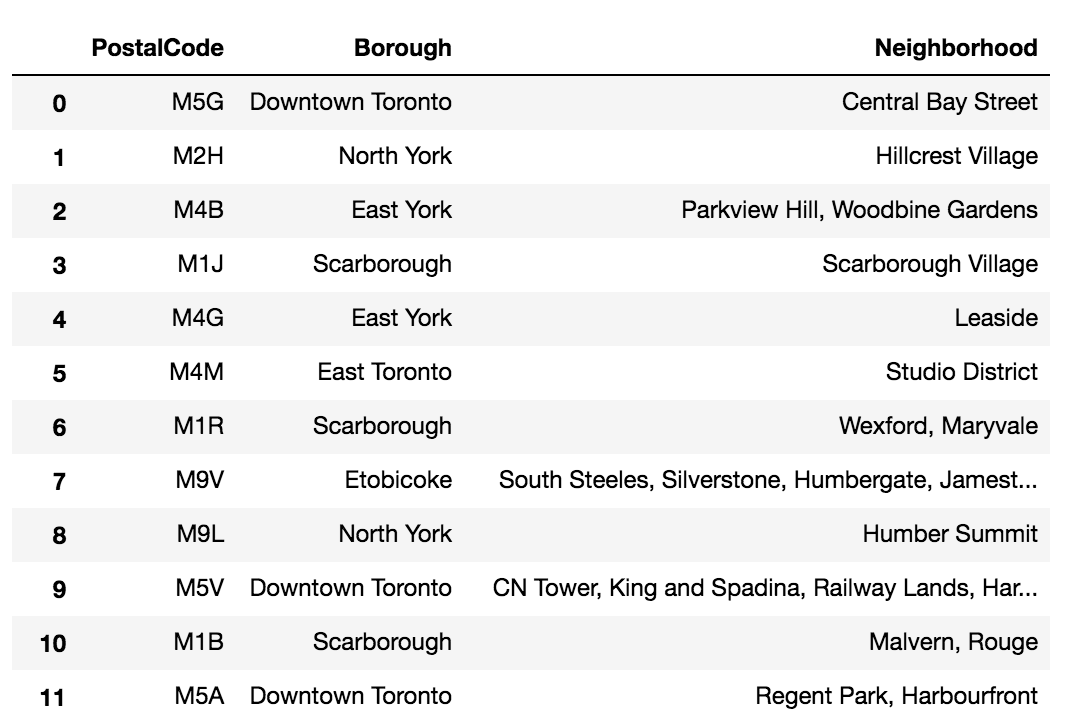

3. To create the above dataframe:

    * The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood
    * Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.
    * More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.

    * If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.
    * Clean your Notebook and add Markdown cells to explain your work and any assumptions you are making.
    * In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
#resp = ur.urlopen(url)

resp = requests.get(url).text

# using beautiful soup to parse the HTML/XML codes.
soup = BeautifulSoup(resp,'html.parser')
#print(soup.prettify())


In [3]:
# extracting the raw table inside that webpage
table = soup.find('table')
Postcode      = []
Borough       = []
Neighbourhood = []

# print(table)

# extracting a clean form of the table
for tr_cell in table.find_all('tr'):
    counter = 1
    Postcode_var      = -1
    Borough_var       = -1
    Neighbourhood_var = -1
    
    for td_cell in tr_cell.find_all('td'):
        if counter == 1: 
            Postcode_var = str(td_cell.text).strip()
        if counter == 2: 
            Borough_var = str(td_cell.text).strip()
            
        if counter == 3: 
            Neighbourhood_var = str(td_cell.text).strip()
        
        counter +=1
         
    
    if(Postcode_var == -1 or Borough_var == -1 or Neighbourhood_var == -1):
        continue
        
    if (Borough_var == 'Not assigned'):
        continue

    if (Borough_var != 'Not assigned') and (Neighbourhood_var == 'Not assigned'):
        Neighbourhood_var = Borough_var
            
        
    Postcode.append(Postcode_var)
    Borough.append(Borough_var)
    Neighbourhood.append(Neighbourhood_var)
#data_lst = list(zip(Postcode, Borough, Neighbourhood))
data_dict = {'Postcode':Postcode, 'Borough':Borough, 'Neighbourhood':Neighbourhood}

## 4. Submit a link to your Notebook on your Github repository. (10 marks)

**Note:** There are different website scraping libraries and packages in Python. For scraping the above table, you can simply use pandas to read the table into a pandas dataframe.

Another way, which would help to learn for more complicated cases of web scraping is using the BeautifulSoup package. Here is the package's main documentation page: http://beautiful-soup-4.readthedocs.io/en/latest/

Use pandas, or the BeautifulSoup package, or any other way you are comfortable with to transform the data in the table on the Wikipedia page into the above pandas dataframe.

In [4]:
neighborhoods = pd.DataFrame.from_dict(data_dict)
neighborhoods.head()

,Postcode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [5]:
neighborhoods.shape

(103, 3)

Now that you have built a dataframe of the postal code of each neighborhood along with the borough name and neighborhood name, in order to utilize the Foursquare location data, we need to get the latitude and the longitude coordinates of each neighborhood.

In an older version of this course, we were leveraging the Google Maps Geocoding API to get the latitude and the longitude coordinates of each neighborhood. However, recently Google started charging for their API: http://geoawesomeness.com/developers-up-in-arms-over-google-maps-api-insane-price-hike/, so we will use the Geocoder Python package instead: https://geocoder.readthedocs.io/index.html.

The problem with this Package is you have to be persistent sometimes in order to get the geographical coordinates of a given postal code. So you can make a call to get the latitude and longitude coordinates of a given postal code and the result would be None, and then make the call again and you would get the coordinates. So, in order to make sure that you get the coordinates for all of our neighborhoods, you can run a while loop for each postal code. Taking postal code M5G as an example, your code would look something like this:

Given that this package can be very unreliable, in case you are not able to get the geographical coordinates of the neighborhoods using the Geocoder package, here is a link to a csv file that has the geographical coordinates of each postal code: http://cocl.us/Geospatial_data

Use the Geocoder package or the csv file to create the following dataframe:
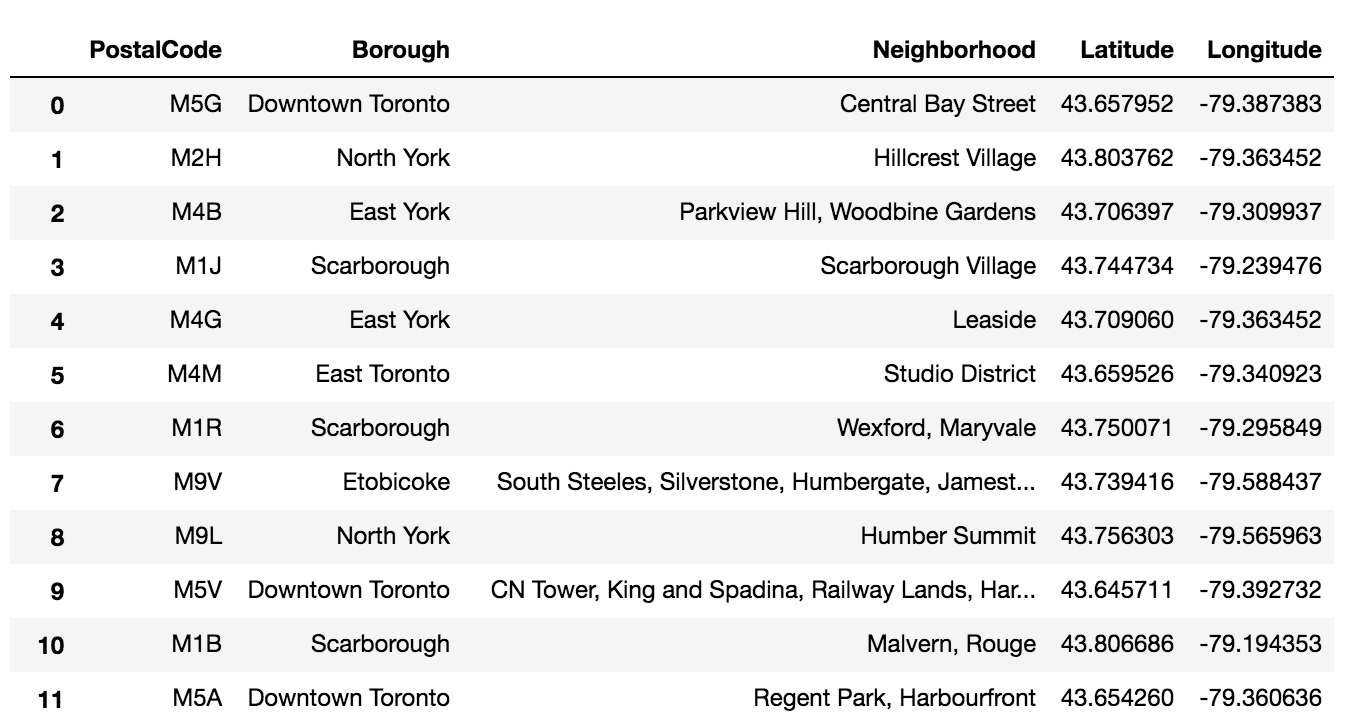

**Important Note:** There is a limit on how many times you can call geocoder.google function. It is 2500 times per day. This should be way more than enough for you to get acquainted with the package and to use it to get the geographical coordinates of the neighborhoods in the Toronto.

## Once you are able to create the above dataframe, submit a link to the new Notebook on your Github repository. (2 marks)

In [6]:
Latitude = []
Longitude = []

file = pd.read_csv('http://cocl.us/Geospatial_data')
for i in neighborhoods['Postcode']:
    index = file.index[file['Postal Code'] == i].tolist()
    latitude = file.loc[index[0] , 'Latitude'].tolist()
    longitude = file.loc[index[0] , 'Longitude'].tolist()
    Latitude.append(latitude)
    Longitude.append(longitude)

neighborhoods['Latitude'] = Latitude
neighborhoods['Longitude'] = Longitude
neighborhoods

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509


Explore and cluster the neighborhoods in Toronto. You can decide to work with only boroughs that contain the word Toronto and then replicate the same analysis we did to the New York City data. It is up to you.

Just make sure:

   1. to add enough Markdown cells to explain what you decided to do and to report any observations you make.
   2. to generate maps to visualize your neighborhoods and how they cluster together. 

## Once you are happy with your analysis, submit a link to the new Notebook on your Github repository. (3 marks)

Use geopy library to get the latitude and longitude values of Toronto.

In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent ny_explorer, as shown below.

In [30]:
address = 'India'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 22.3511148, 78.6677428.


Create a map of Toronto with neighborhoods superimposed on top.

In [32]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=1)
map_toronto

In [8]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

Define Foursquare Credentials and Version

In [9]:
CLIENT_ID = '522I3UVC35KIYW1UPJE5ML0BM0AYFFNS235EX0V4ERKQQWAC' # your Foursquare ID
CLIENT_SECRET = 'NFWYD5U0SLJRPJ5M0TUS5S4N2D3GYFZK4BNW3USJOACM2GN4' # your Foursquare Secret
VERSION = '20200709' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 522I3UVC35KIYW1UPJE5ML0BM0AYFFNS235EX0V4ERKQQWAC
CLIENT_SECRET:NFWYD5U0SLJRPJ5M0TUS5S4N2D3GYFZK4BNW3USJOACM2GN4


Folium is a great visualization library. Feel free to zoom into the above map, and click on each circle mark to reveal the name of the neighborhood and its respective borough.

However, for illustration purposes, let's simplify the above map and segment and cluster only the neighborhoods in Manhattan. So let's slice the original dataframe and create a new dataframe of the Manhattan data.


In [10]:
toronto_data = neighborhoods[neighborhoods['Borough'].str.contains('Toronto')].reset_index(drop=True)
toronto_data.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M4E,East Toronto,The Beaches,43.676357,-79.293031


In [11]:
# I will be using the same coordinates for the previous view
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(toronto_data['Latitude'], toronto_data['Longitude'], toronto_data['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

Let's explore the first neighborhood in our dataframe.

Get the neighborhood's name.

In [12]:
#Get the neighborhood's name.
toronto_data.loc[0, 'Neighbourhood']

'Regent Park, Harbourfront'

In [13]:
#Get the neighborhood's latitude and longitude values.

neighborhood_latitude = toronto_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = toronto_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = toronto_data.loc[0, 'Neighbourhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Regent Park, Harbourfront are 43.6542599, -79.3606359.


In [14]:
# type your answer here
LIMIT = 100
radius = 500

url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    VERSION, 
    radius, 
    LIMIT)

url

'https://api.foursquare.com/v2/venues/explore?client_id=522I3UVC35KIYW1UPJE5ML0BM0AYFFNS235EX0V4ERKQQWAC&client_secret=NFWYD5U0SLJRPJ5M0TUS5S4N2D3GYFZK4BNW3USJOACM2GN4&ll=43.6542599,-79.3606359&v=20200709&radius=500&limit=100'

### Let's create a function to repeat the same process to all the neighborhoods in Manhattan

In [15]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [16]:
toronto_venues = getNearbyVenues(names=neighborhoods['Neighbourhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude']
                                  )


Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue, Humber Valley Village
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto, Broadview North (Old East York)
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmo

In [17]:
#Let's check the size of the resulting dataframe
print(toronto_venues.shape)
toronto_venues.head()

(2136, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,TTC stop #8380,43.752672,-79.326351,Bus Stop
2,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
3,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
4,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant


In [18]:
#Let's check how many venues were returned for each neighborhood

toronto_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Agincourt,4,4,4,4,4,4
"Alderwood, Long Branch",8,8,8,8,8,8
"Bathurst Manor, Wilson Heights, Downsview North",20,20,20,20,20,20
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",24,24,24,24,24,24
...,...,...,...,...,...,...
"Willowdale, Willowdale East",35,35,35,35,35,35
"Willowdale, Willowdale West",6,6,6,6,6,6
Woburn,3,3,3,3,3,3


In [19]:
#Let's find out how many unique categories can be curated from all the returned venues

print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 269 uniques categories.


# Analyze Each Neighborhood

In [20]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighbourhood'] = toronto_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Neighbourhood,Accessories Store,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
#And let's examine the new dataframe size.

toronto_onehot.shape

(2136, 270)

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [22]:
toronto_grouped = toronto_onehot.groupby('Neighbourhood').mean().reset_index()

toronto_grouped

,Neighbourhood,Accessories Store,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,"Alderwood, Long Branch",0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,"Bathurst Manor, Wilson Heights, Downsview North",0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,Bayview Village,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,"Bedford Park, Lawrence Manor East",0.0,0.0,0.0,0.0,0.0,0.0,0.041667,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,"Willowdale, Willowdale East",0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.028571,0.0,0.0,0.0,0.0,0.0,0.0
92,"Willowdale, Willowdale West",0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
93,Woburn,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
94,Woodbine Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.142857,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
#Let's confirm the new size

toronto_grouped.shape

(96, 270)

In [24]:
#Let's print each neighborhood along with the top 5 most common venues

num_top_venues = 5

for hood in toronto_grouped['Neighbourhood']:

    print("----"+hood+"----")

    temp = toronto_grouped[toronto_grouped['Neighbourhood'] == hood].T.reset_index()

    temp.columns = ['venue','freq']

    temp = temp.iloc[1:]

    temp['freq'] = temp['freq'].astype(float)

    temp = temp.round({'freq': 2})

    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))

    print('\n')


----Agincourt----
                       venue  freq
0             Breakfast Spot  0.25
1                     Lounge  0.25
2  Latin American Restaurant  0.25
3               Skating Rink  0.25
4                Men's Store  0.00


----Alderwood, Long Branch----
                venue  freq
0         Pizza Place  0.25
1                 Gym  0.12
2      Sandwich Place  0.12
3  Athletics & Sports  0.12
4         Coffee Shop  0.12


----Bathurst Manor, Wilson Heights, Downsview North----
                 venue  freq
0                 Bank  0.10
1          Coffee Shop  0.10
2    Mobile Phone Shop  0.05
3       Sandwich Place  0.05
4  Fried Chicken Joint  0.05


----Bayview Village----
                 venue  freq
0                 Bank  0.25
1   Chinese Restaurant  0.25
2  Japanese Restaurant  0.25
3                 Café  0.25
4    Accessories Store  0.00


----Bedford Park, Lawrence Manor East----
                venue  freq
0      Sandwich Place  0.08
1          Restaurant  0.08
2    Sushi 

Let's put that into a pandas dataframe

First, let's write a function to sort the venues in descending order.

In [25]:
def return_most_common_venues(row, num_top_venues):

    row_categories = row.iloc[1:]

    row_categories_sorted = row_categories.sort_values(ascending=False)

    

    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [26]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues

columns = ['Neighbourhood']

for ind in np.arange(num_top_venues):

    try:

        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))

    except:

        columns.append('{}th Most Common Venue'.format(ind+1))


# create a new dataframe

neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)

neighbourhoods_venues_sorted['Neighbourhood'] = toronto_grouped['Neighbourhood']


for ind in np.arange(toronto_grouped.shape[0]):

    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)
    

neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Breakfast Spot,Lounge,Skating Rink,Latin American Restaurant,Electronics Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant
1,"Alderwood, Long Branch",Pizza Place,Pharmacy,Gym,Sandwich Place,Coffee Shop,Athletics & Sports,Pub,Dog Run,Diner,Discount Store
2,"Bathurst Manor, Wilson Heights, Downsview North",Bank,Coffee Shop,Ice Cream Shop,Sandwich Place,Diner,Restaurant,Middle Eastern Restaurant,Supermarket,Sushi Restaurant,Mobile Phone Shop
3,Bayview Village,Japanese Restaurant,Bank,Chinese Restaurant,Café,Yoga Studio,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore
4,"Bedford Park, Lawrence Manor East",Coffee Shop,Restaurant,Sandwich Place,Italian Restaurant,Sushi Restaurant,Grocery Store,Thai Restaurant,Greek Restaurant,Pharmacy,Pizza Place


## Cluster Neighborhoods

Run k-means to cluster the neighborhood into 5 clusters.

In [27]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [28]:
# add clustering labels
#neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = toronto_data


# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')


toronto_merged.head() # check the last columns!

,Postcode,Borough,Neighbourhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,Coffee Shop,Bakery,Park,Breakfast Spot,Café,Pub,Theater,Yoga Studio,Cosmetics Shop,Shoe Store
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,Coffee Shop,Diner,Yoga Studio,Sandwich Place,Sushi Restaurant,Italian Restaurant,Fried Chicken Joint,Beer Bar,Burrito Place,Mexican Restaurant
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,Clothing Store,Coffee Shop,Japanese Restaurant,Hotel,Café,Cosmetics Shop,Bubble Tea Shop,Italian Restaurant,Pizza Place,Fast Food Restaurant
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,Restaurant,Café,Coffee Shop,Cocktail Bar,Cosmetics Shop,American Restaurant,Seafood Restaurant,Beer Bar,Hotel,Creperie
4,M4E,East Toronto,The Beaches,43.676357,-79.293031,Health Food Store,Neighborhood,Pub,Trail,Yoga Studio,Doner Restaurant,Diner,Discount Store,Distribution Center,Dog Run


### Finally, let's visualize the resulting clusters

In [29]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)


# set color scheme for the clusters
x = np.arange(kclusters)

ys = [i + x + (i*x)**2 for i in range(kclusters)]

colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))

rainbow = [colors.rgb2hex(i) for i in colors_array]


# add markers to the map
markers_colors = []

for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):

    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)

    folium.CircleMarker(

        [lat, lon],

        radius=5,

        popup=label,

        color=rainbow[cluster-1],

        fill=True,

        fill_color=rainbow[cluster-1],

        fill_opacity=0.7).add_to(map_clusters)

       

map_clusters

KeyError: 'Cluster Labels'